In [39]:
import pandas as pd
import numpy as np
import os
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import SVC
from sklearn_pandas import DataFrameMapper
from datetime import datetime
import datetime
import re
from dateutil.parser import parse
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import plotly.graph_objects as go
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", 
        color_codes=True, 
        font_scale = 2)

In [2]:
os.chdir('/Users/patrickrs/Documents/GitLab/patrick-steiner/03-Machine-Learning')

In [3]:
data = pd.read_csv("/Users/patrickrs/Documents/GitLab/patrick-steiner/Exercises/data/PlayerAttributeData.csv",
                  delimiter = ",",
                  index_col = "ID",
                  #dtype = "float64",
                  verbose = True
                  )

Tokenization took: 46.13 ms
Type conversion took: 46.33 ms
Parser memory cleanup took: 0.04 ms
Tokenization took: 3.15 ms
Type conversion took: 6.84 ms
Parser memory cleanup took: 0.01 ms


/opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning:

Columns (11,24) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
data.drop("Unnamed: 0", 
          axis = 1,
          inplace = True)

In [5]:
data

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
ID,,,,,,,,,,,,,,,,,,,,,
20801,89,63,89,63,93,95,85,81,91,94,...,96,83,94,23,91,92,31,80,85,88
158023,92,48,90,95,95,96,77,89,97,95,...,95,88,85,26,87,73,28,59,90,85
190871,94,56,96,82,95,92,75,81,96,89,...,88,81,80,33,90,78,24,53,80,83
176580,88,78,86,60,91,83,77,86,86,94,...,93,83,87,38,77,89,45,80,84,88
167495,58,29,52,35,48,70,15,14,30,13,...,85,55,25,11,61,44,10,83,70,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237463,24,16,38,26,12,23,14,13,12,5,...,40,19,19,10,32,28,11,50,26,6
11728,25,44,35,44,22,44,11,12,11,11,...,51,12,13,13,25,32,12,47,17,12
231381,66,26,60,77,41,50,28,32,37,47,...,54,42,42,14,51,33,17,32,37,33


In [6]:
pd.options.display.max_columns = None

In [7]:
data = data.applymap(lambda x: str(x).split("+")[0])
data = data.applymap(lambda x: str(x).split("-")[0])

In [8]:
data = data.astype("int")

In [9]:
#data = StandardScaler().fit_transform(data)
data = pd.DataFrame(StandardScaler().fit_transform(data),
                  columns = data.columns,
                   index = data.index)

In [10]:
data.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20801,1.636816,0.410909,1.734681,-0.057864,2.076961,2.870360,1.907976,1.824837,1.892122,2.500640,1.867229,-0.547365,-0.324097,-0.083825,-0.146033,-0.324472,2.048101,-0.849040,2.532658,1.580033,2.322443,-1.024815,2.277464,2.333016,3.717432,1.655064,2.203633,-1.050640,1.787786,1.804927,-0.753235,1.165776,2.222647,2.524572
158023,1.838069,-0.447806,1.802290,2.212609,2.196018,2.947720,1.474575,2.258186,2.208066,2.551988,2.663731,-0.603576,-0.324097,-0.083825,-0.146033,-0.490378,1.071633,-1.187497,0.260771,2.223732,2.114996,-1.441950,1.581790,2.230117,3.608400,1.990137,1.686334,-0.911002,1.514505,0.611645,-0.890636,-0.498640,2.570182,2.355411
190871,1.972237,0.010175,2.207944,1.290229,2.196018,2.638280,1.366224,1.824837,2.155409,2.243903,2.322373,-0.434944,-0.441657,-0.083825,-0.087648,-0.324472,0.554680,-0.510583,-0.328237,1.451294,1.544516,-1.071163,2.024491,2.075769,2.845183,1.521035,1.398946,-0.585180,1.719465,0.925666,-1.073838,-0.974188,1.875113,2.242637
176580,1.569732,1.269625,1.531855,-0.270720,1.957904,1.942040,1.474575,2.095680,1.628836,2.500640,2.322373,0.576844,0.498826,0.879739,0.963288,1.113385,1.416269,-0.268828,0.344915,0.743226,2.011272,-0.654028,2.277464,2.178668,3.390338,1.655064,1.801289,-0.352449,0.831304,1.616514,-0.112029,1.165776,2.153140,2.524572
167495,-0.442795,-1.535512,-0.766848,-2.044527,-0.601824,0.936361,-1.884289,-1.804469,-1.319973,-1.658496,-1.830814,4.174314,4.319537,4.733996,4.349635,3.989098,-1.570574,-0.800689,1.102211,0.421377,-1.619054,-1.580996,-0.125772,-1.937286,2.518090,-0.221345,-1.762323,-1.609193,-0.261817,-1.209681,-1.715044,1.403550,1.180044,-1.817236


In [11]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]

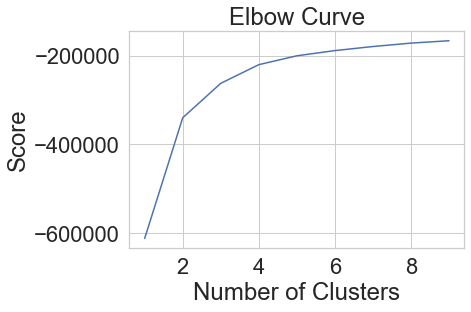

In [12]:
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [13]:
# Ideal number of clusters seems to be 4

For n_clusters = 2 The average silhouette_score is : 0.5514668
For n_clusters = 3 The average silhouette_score is : 0.2636415
For n_clusters = 4 The average silhouette_score is : 0.25351435
For n_clusters = 5 The average silhouette_score is : 0.23218426
For n_clusters = 6 The average silhouette_score is : 0.20307018
For n_clusters = 7 The average silhouette_score is : 0.19855644
For n_clusters = 8 The average silhouette_score is : 0.19537988
For n_clusters = 9 The average silhouette_score is : 0.18334539


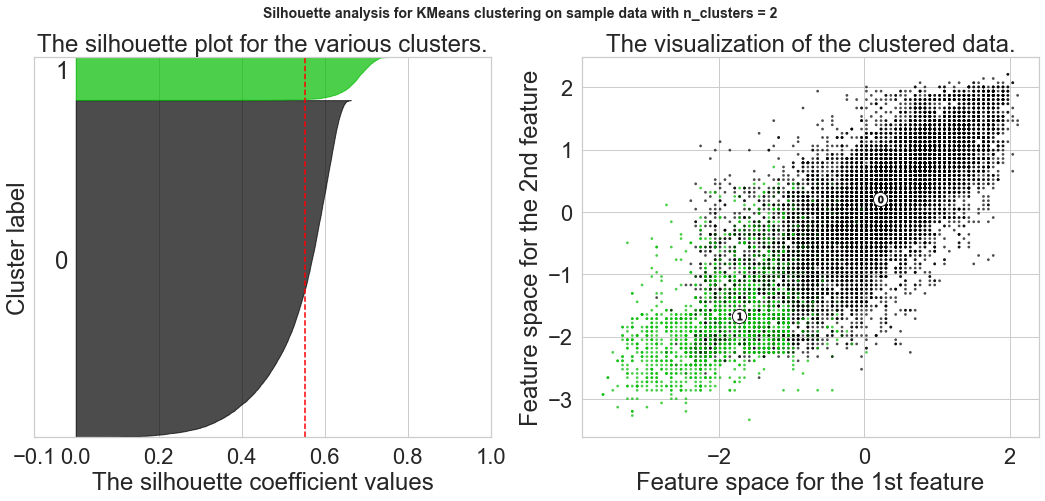

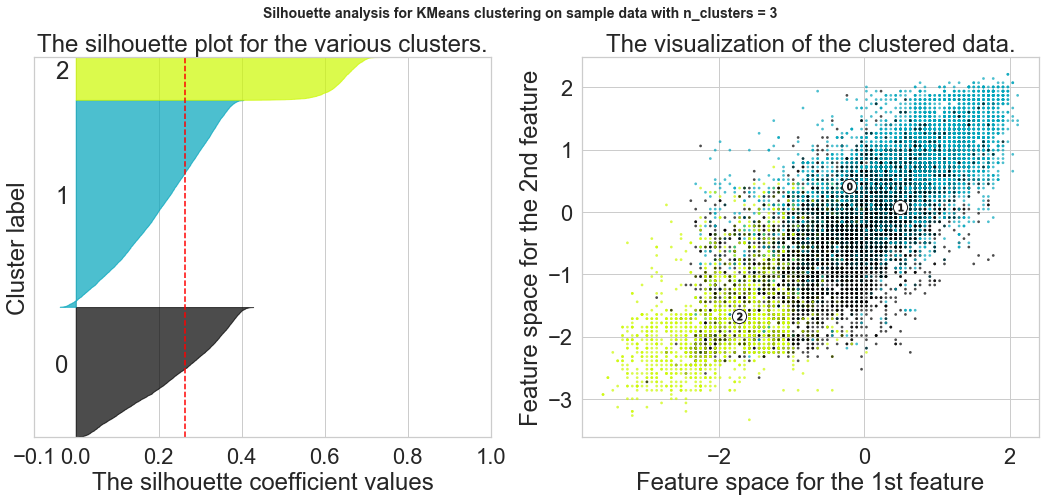

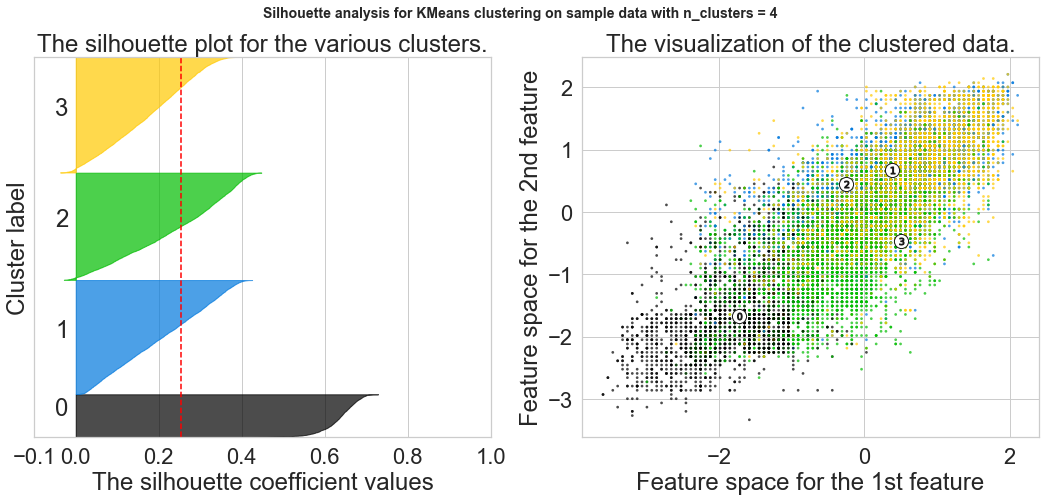

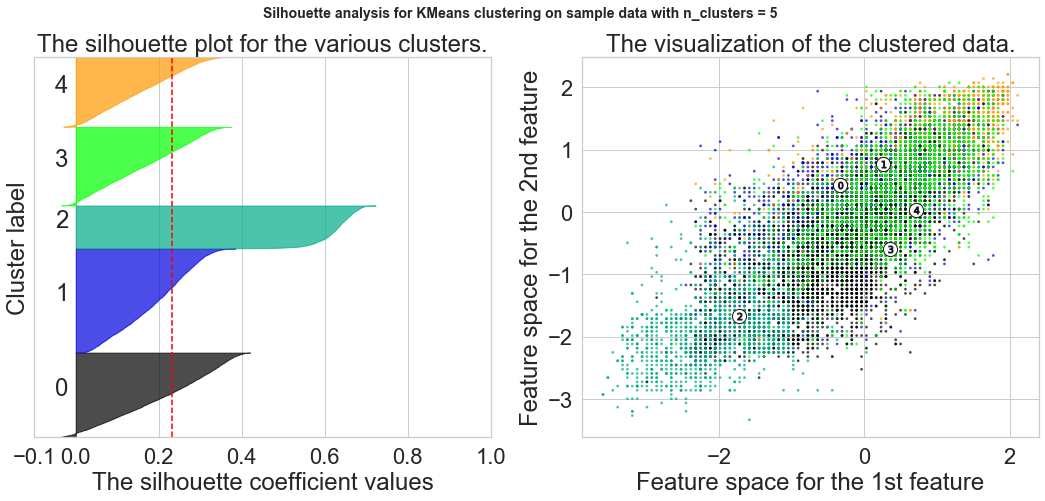

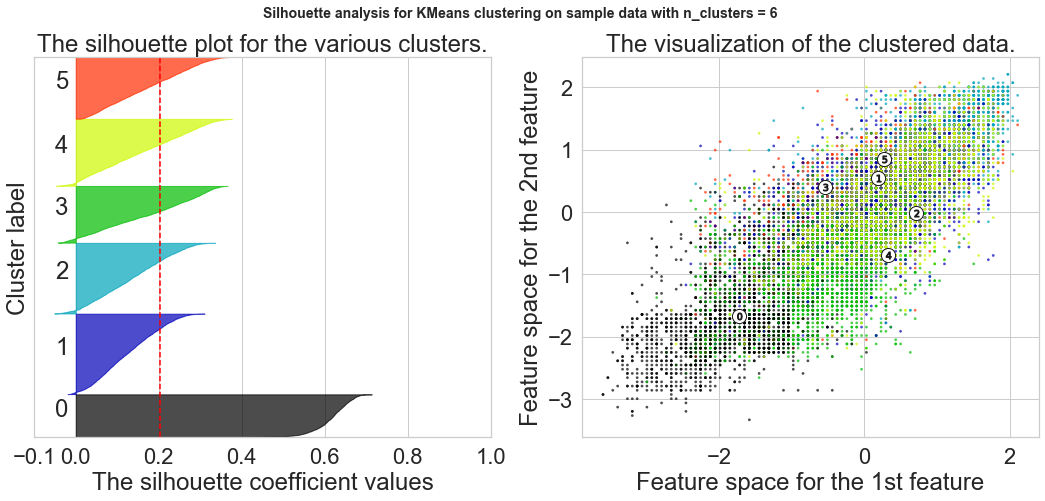

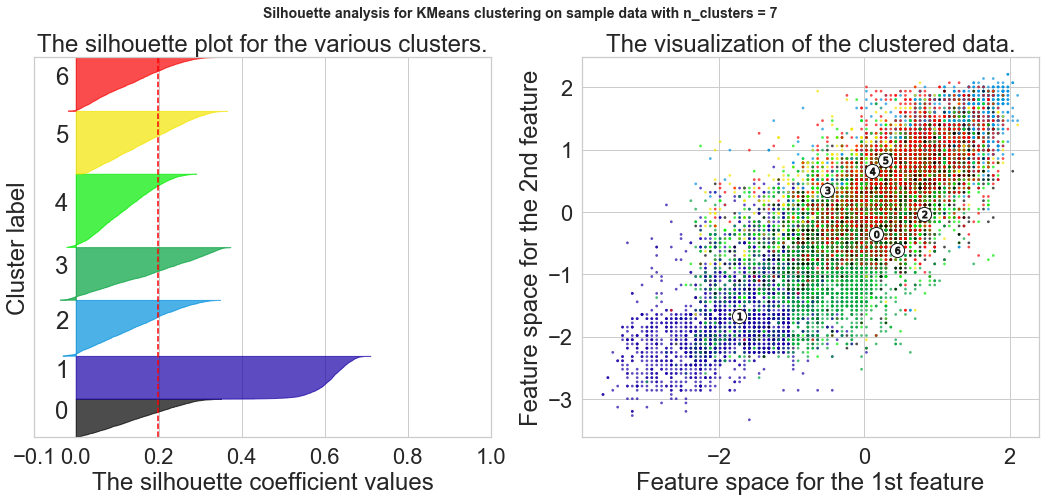

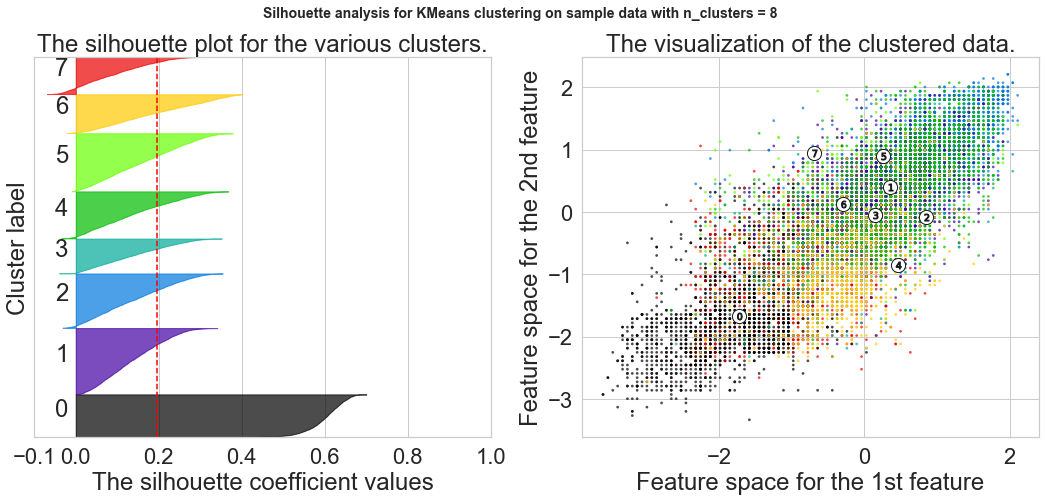

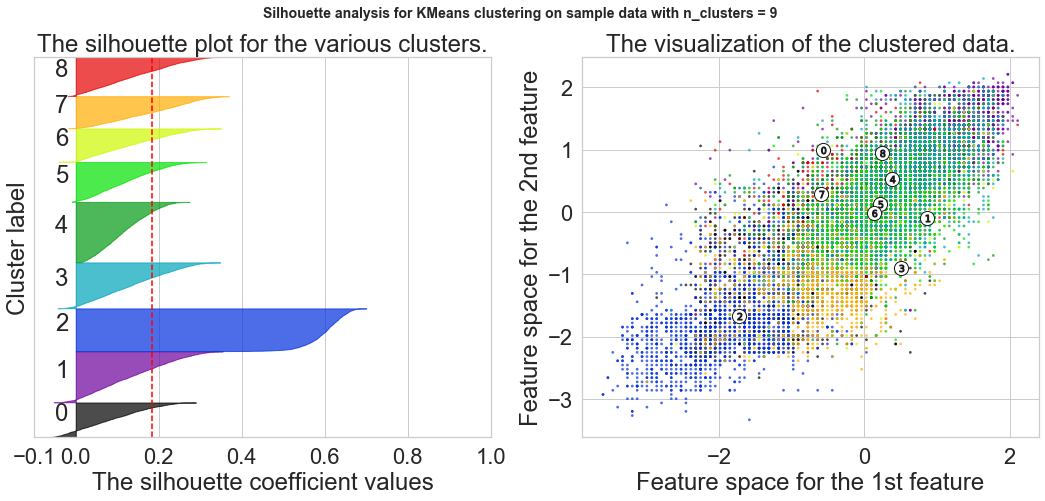

In [14]:
# snippet from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
K_clusters = range(2,10)
# Have to use np methods in the code below,thus the following: 
X = data.values  
X = X.astype('float32') 

for n_clusters in K_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [15]:
# Based on the soillhoute score the ideal nr of clusters would be 6. 
# 

### Use the PlayerPlayingPositionData.csv data to associate each player’s preferred position. How does this correspond to the clusters that you have obtained by unsupervised learning? Can you identify some outliers?

In [16]:
pos = pd.read_csv("/Users/patrickrs/Documents/GitLab/patrick-steiner/Exercises/data/PlayerPlayingPositionData.csv",
                  delimiter = ",",
                  index_col = "ID",
                  usecols = ["Preferred Positions", "ID"],
                  verbose = True
                  )

Tokenization took: 49.07 ms
Type conversion took: 3.58 ms
Parser memory cleanup took: 0.03 ms


In [17]:
pos

,Preferred Positions
ID,
20801,ST LW
158023,RW
190871,LW
176580,ST
167495,GK
...,...
237463,GK
11728,GK
231381,ST


In [18]:
data = data.merge(right = pos, 
                  how = 'inner',
                  right_on = pos.index,
                  left_on = data.index,
                  left_index = True
                  )


In [19]:
data.drop("key_0", 1, inplace = True)

In [20]:
# I will try 6 different clusters:

In [21]:
data

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20801,1.636816,0.410909,1.734681,-0.057864,2.076961,2.870360,1.907976,1.824837,1.892122,2.500640,1.867229,-0.547365,-0.324097,-0.083825,-0.146033,-0.324472,2.048101,-0.849040,2.532658,1.580033,2.322443,-1.024815,2.277464,2.333016,3.717432,1.655064,2.203633,-1.050640,1.787786,1.804927,-0.753235,1.165776,2.222647,2.524572,ST LW
158023,1.838069,-0.447806,1.802290,2.212609,2.196018,2.947720,1.474575,2.258186,2.208066,2.551988,2.663731,-0.603576,-0.324097,-0.083825,-0.146033,-0.490378,1.071633,-1.187497,0.260771,2.223732,2.114996,-1.441950,1.581790,2.230117,3.608400,1.990137,1.686334,-0.911002,1.514505,0.611645,-0.890636,-0.498640,2.570182,2.355411,RW
190871,1.972237,0.010175,2.207944,1.290229,2.196018,2.638280,1.366224,1.824837,2.155409,2.243903,2.322373,-0.434944,-0.441657,-0.083825,-0.087648,-0.324472,0.554680,-0.510583,-0.328237,1.451294,1.544516,-1.071163,2.024491,2.075769,2.845183,1.521035,1.398946,-0.585180,1.719465,0.925666,-1.073838,-0.974188,1.875113,2.242637,LW
176580,1.569732,1.269625,1.531855,-0.270720,1.957904,1.942040,1.474575,2.095680,1.628836,2.500640,2.322373,0.576844,0.498826,0.879739,0.963288,1.113385,1.416269,-0.268828,0.344915,0.743226,2.011272,-0.654028,2.277464,2.178668,3.390338,1.655064,1.801289,-0.352449,0.831304,1.616514,-0.112029,1.165776,2.153140,2.524572,ST
167495,-0.442795,-1.535512,-0.766848,-2.044527,-0.601824,0.936361,-1.884289,-1.804469,-1.319973,-1.658496,-1.830814,4.174314,4.319537,4.733996,4.349635,3.989098,-1.570574,-0.800689,1.102211,0.421377,-1.619054,-1.580996,-0.125772,-1.937286,2.518090,-0.221345,-1.762323,-1.609193,-0.261817,-1.209681,-1.715044,1.403550,1.180044,-1.817236,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237463,-2.723658,-2.279732,-1.713373,-2.683097,-2.744852,-2.699558,-1.938464,-1.858637,-2.267804,-2.069275,-1.773921,1.644843,1.791989,1.963749,1.488755,1.721709,-2.432163,-1.816061,-2.852556,-2.024676,-2.085810,-1.627344,-2.023063,-2.245983,-2.388309,-2.633870,-2.107189,-1.655739,-2.243100,-2.214551,-1.669244,-1.211962,-1.878259,-2.099171,GK
11728,-2.656573,-0.676797,-1.916200,-1.405956,-2.149567,-1.074999,-2.100990,-1.912806,-2.320462,-1.761191,-1.830814,1.251370,1.968330,1.361522,1.955838,1.113385,-2.317284,-1.477603,-1.169676,-2.539634,-1.619054,-1.395602,-1.706848,-1.885837,-1.188967,-3.102972,-2.452055,-1.516101,-2.721340,-1.963333,-1.623443,-1.449736,-2.503821,-1.760848,GK
231381,0.093879,-1.707255,-0.225977,0.935468,-1.018524,-0.610839,-1.180011,-0.829431,-0.951372,0.087314,-1.034312,-0.322523,-0.088976,-0.264493,-0.262804,-0.324472,-0.306909,-1.477603,0.681491,-1.445348,0.196109,-1.210208,0.569901,-0.188006,-0.861874,-1.092534,-0.785204,-1.469555,-0.945018,-1.900529,-1.394441,-2.638605,-1.113684,-0.576719,ST


In [22]:
kmeans = KMeans(n_clusters = 6, init ='k-means++')

In [23]:
data['cluster_label'] = kmeans.fit_predict(data[data.columns[1:len(data.columns)-1]]) 
# not using the preferred positions col

In [37]:
data.drop_duplicates(inplace = True)

In [38]:
data.groupby(["cluster_label", "Preferred Positions"])["cluster_label", "Preferred Positions"].count()

/opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



cluster_label  Preferred Positions
cluster_label Preferred Positions                                    
0             CAM                             12                   12
              CAM CB CDM                       1                    1
              CAM CB CM                        1                    1
              CAM CDM                         14                   14
              CAM CDM CM                      50                   50
...                                          ...                  ...
5             RWB CB RB                        1                    1
              RWB RB                           9                    9
              ST                               2                    2
              ST CB                            3                    3
              ST LB CB                         1                    1

[1393 rows x 2 columns]

In [26]:
pd.options.display.max_rows = 25

In [27]:
data.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,cluster_label
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20801,1.636816,0.410909,1.734681,-0.057864,2.076961,2.870360,1.907976,1.824837,1.892122,2.500640,1.867229,-0.547365,-0.324097,-0.083825,-0.146033,-0.324472,2.048101,-0.849040,2.532658,1.580033,2.322443,-1.024815,2.277464,2.333016,3.717432,1.655064,2.203633,-1.050640,1.787786,1.804927,-0.753235,1.165776,2.222647,2.524572,ST LW,2
158023,1.838069,-0.447806,1.802290,2.212609,2.196018,2.947720,1.474575,2.258186,2.208066,2.551988,2.663731,-0.603576,-0.324097,-0.083825,-0.146033,-0.490378,1.071633,-1.187497,0.260771,2.223732,2.114996,-1.441950,1.581790,2.230117,3.608400,1.990137,1.686334,-0.911002,1.514505,0.611645,-0.890636,-0.498640,2.570182,2.355411,RW,2
190871,1.972237,0.010175,2.207944,1.290229,2.196018,2.638280,1.366224,1.824837,2.155409,2.243903,2.322373,-0.434944,-0.441657,-0.083825,-0.087648,-0.324472,0.554680,-0.510583,-0.328237,1.451294,1.544516,-1.071163,2.024491,2.075769,2.845183,1.521035,1.398946,-0.585180,1.719465,0.925666,-1.073838,-0.974188,1.875113,2.242637,LW,2
176580,1.569732,1.269625,1.531855,-0.270720,1.957904,1.942040,1.474575,2.095680,1.628836,2.500640,2.322373,0.576844,0.498826,0.879739,0.963288,1.113385,1.416269,-0.268828,0.344915,0.743226,2.011272,-0.654028,2.277464,2.178668,3.390338,1.655064,1.801289,-0.352449,0.831304,1.616514,-0.112029,1.165776,2.153140,2.524572,ST,2
167495,-0.442795,-1.535512,-0.766848,-2.044527,-0.601824,0.936361,-1.884289,-1.804469,-1.319973,-1.658496,-1.830814,4.174314,4.319537,4.733996,4.349635,3.989098,-1.570574,-0.800689,1.102211,0.421377,-1.619054,-1.580996,-0.125772,-1.937286,2.518090,-0.221345,-1.762323,-1.609193,-0.261817,-1.209681,-1.715044,1.403550,1.180044,-1.817236,GK,1


In [28]:
d = data["Preferred Positions"].str.split(" ",expand=True,)

In [29]:
d.columns = ["1 pp", "2 pp", "3 pp", "4 pp", "5 pp"]

In [30]:
d.head()

,1 pp,2 pp,3 pp,4 pp,5 pp
ID,,,,,
20801,ST,LW,,None,None
158023,RW,,None,None,None
190871,LW,,None,None,None
176580,ST,,None,None,None
167495,GK,,None,None,None


In [31]:
# Get unique elements in multiple columns
uniqueValues = (d['1 pp'].append(d['2 pp']).append(d['3 pp']).append(d['4 pp']).append(d['5 pp'])).unique()
 
print('Unique elements in column "Preferred POsitions" :')
print(uniqueValues)

Unique elements in column "Preferred POsitions" :
['ST' 'RW' 'LW' 'GK' 'CDM' 'CB' 'RM' 'CM' 'LM' 'LB' 'CAM' 'RB' 'CF' 'RWB'
 'LWB' '' None]


In [32]:
data = data.merge(right = d, 
                  how = 'inner',
                  right_on = d.index,
                  left_on = data.index,
                  left_index = True
                  )

In [33]:
l = ["1 pp", "2 pp", "3 pp", "4 pp"]

In [34]:
pd.options.display.max_rows = 25

In [35]:
enc = OneHotEncoder(handle_unknown='ignore')

In [36]:
enc.fit_transform(d)

TypeError: argument must be a string or number

In [ ]:
d

In [ ]:
data.groupby("cluster_label")[l].count()

In [ ]:
fig = go.Figure(data=[go.Sankey(
      node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 2, 3, 4], # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = [uniqueValues],
      value = data["1 pp"]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()